In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('insurance_part2_data.csv')

In [3]:
df.head(5)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [5]:
df.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


## Checking missing values and duplicate records in the dataset

In [6]:
df.isnull().sum().sum()

0

In [7]:
columns = [i for i in df.columns]
for i in columns:
    if '?' in df[i]:
        print("missing values is present in {}".format(i))
    else:
        print("{} has no missing values".format(i))

Age has no missing values
Agency_Code has no missing values
Type has no missing values
Claimed has no missing values
Commision has no missing values
Channel has no missing values
Duration has no missing values
Sales has no missing values
Product Name has no missing values
Destination has no missing values


In [8]:
df.duplicated().sum()

139

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

## checking outliers present in the dataset

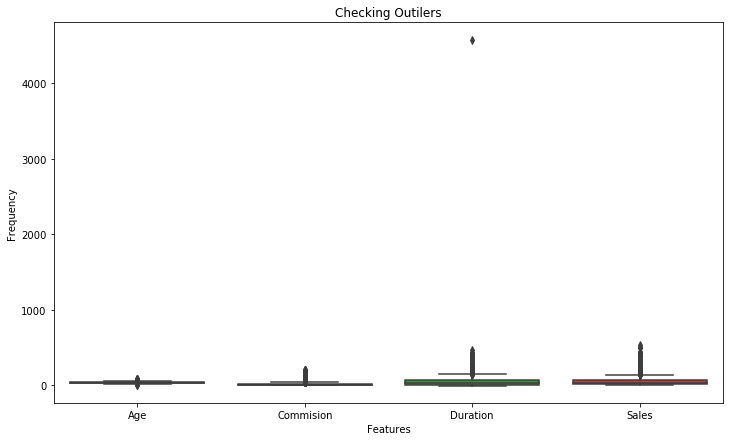

In [13]:
plt.figure(figsize=(12,7));
sns.boxplot(data=df);
plt.title('Checking Outilers');
plt.xlabel('Features');
plt.ylabel('Frequency');

## Outlier Treatment

In [15]:
def remove_outliers(data):
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)
    IQR = Q3 - Q1
    return (Q1 - 1.5*IQR), (Q3 + 1.5*IQR)

In [20]:
for i in list(df):
    if df[i].dtype != 'object':
        ll, ul = remove_outliers(df[i])
        df[i] = np.where(df[i] < ll, ll, df[i])
        df[i] = np.where(df[i] > ul, ul, df[i])

## Again checking outliers present in the dataset

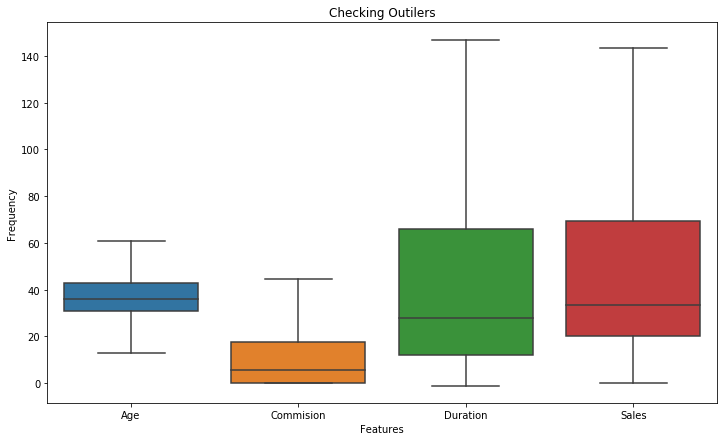

In [22]:
plt.figure(figsize=(12,7));
sns.boxplot(data=df);
plt.title('Checking Outilers');
plt.xlabel('Features');
plt.ylabel('Frequency');